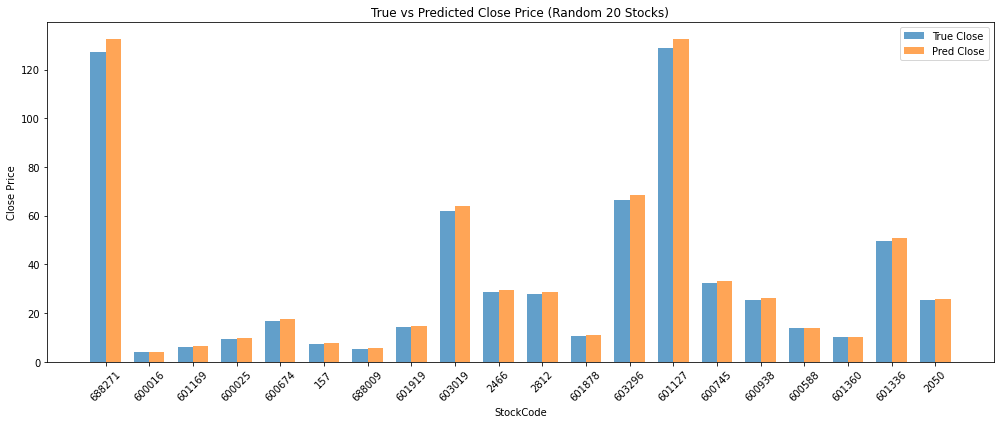

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 读取预测结果
df = pd.read_csv("./output/all_predictions.csv")

# 如果少于20只股票，直接画全部
num_stocks = min(20, len(df))
sampled_df = df.sample(n=num_stocks, random_state=42).sort_values("Change_%", ascending=False)

# 画图
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(num_stocks)

plt.bar(index, sampled_df["True_Close"], bar_width, label="True Close", alpha=0.7)
plt.bar([i + bar_width for i in index], sampled_df["Pred_Close"], bar_width, label="Pred Close", alpha=0.7)

# 设置坐标轴与标签
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("True vs Predicted Close Price (Random 20 Stocks)")
plt.xticks([i + bar_width / 2 for i in index], sampled_df["StockCode"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()

# 保存和显示图像
plt.savefig("./output/close_comparison_20_random.png")
plt.show()


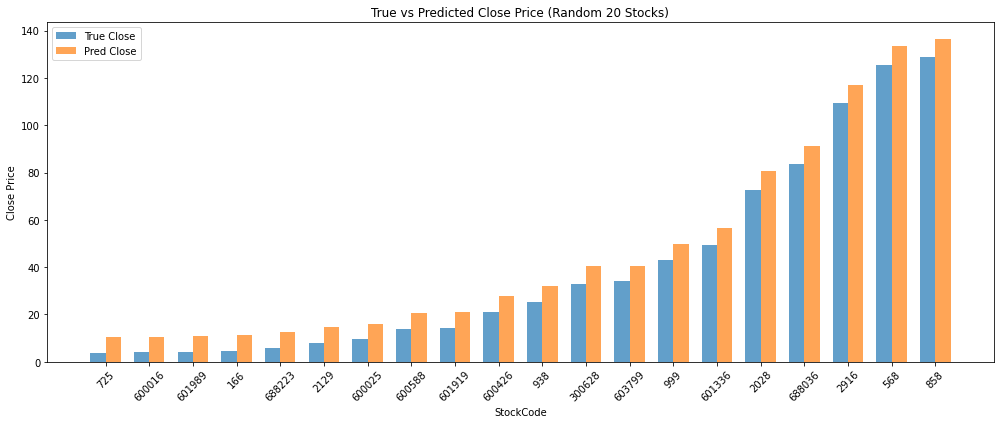

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# 读取预测结果
df = pd.read_csv("./output/all_predictions_scaled.csv")

# 如果少于20只股票，直接画全部
num_stocks = min(20, len(df))
sampled_df = df.sample(n=num_stocks, random_state=42).sort_values("Change_%", ascending=False)

# 画图
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(num_stocks)

plt.bar(index, sampled_df["True_Close"], bar_width, label="True Close", alpha=0.7)
plt.bar([i + bar_width for i in index], sampled_df["Pred_Close"], bar_width, label="Pred Close", alpha=0.7)

# 设置坐标轴与标签
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("True vs Predicted Close Price (Random 20 Stocks)")
plt.xticks([i + bar_width / 2 for i in index], sampled_df["StockCode"].astype(str), rotation=45)
plt.legend()
plt.tight_layout()

# 保存和显示图像
plt.savefig("./output/close_comparison_20_random.png")
plt.show()


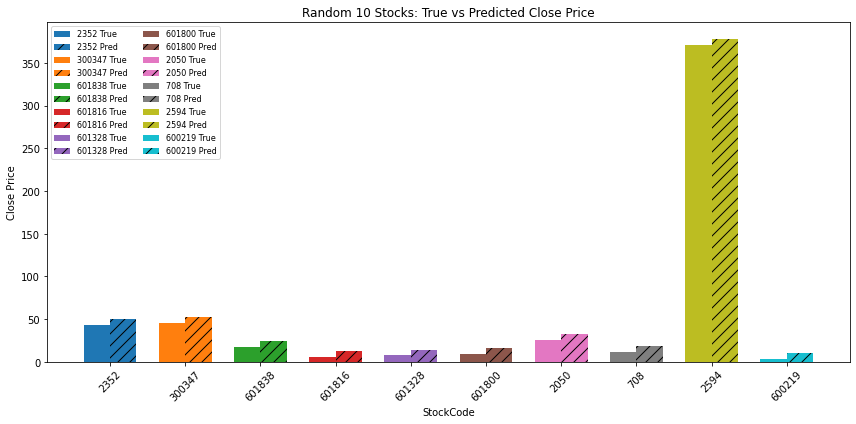

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# 读取预测结果
df = pd.read_csv("./output/all_predictions_scaled.csv")

# 随机抽取10只股票，每次不同
unique_stocks = df["StockCode"].unique()
sampled_codes = random.sample(list(unique_stocks), min(10, len(unique_stocks)))
sampled_df = df[df["StockCode"].isin(sampled_codes)].copy()

# 设置颜色（matplotlib自动）
colors = plt.cm.get_cmap("tab10", len(sampled_codes))  # 10种颜色

# 创建图形
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(sampled_codes))

for i, code in enumerate(sampled_codes):
    stock_data = sampled_df[sampled_df["StockCode"] == code].iloc[0]
    plt.bar(x[i], stock_data["True_Close"], width=bar_width, color=colors(i), label=f"{code} True")
    plt.bar(x[i] + bar_width, stock_data["Pred_Close"], width=bar_width, color=colors(i), hatch='//', label=f"{code} Pred")

# 设置图表
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("Random 10 Stocks: True vs Predicted Close Price")
plt.xticks(x + bar_width / 2, sampled_codes, rotation=45)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()

# 保存图像
plt.savefig("./output/close_comparison_random10.png")
plt.show()


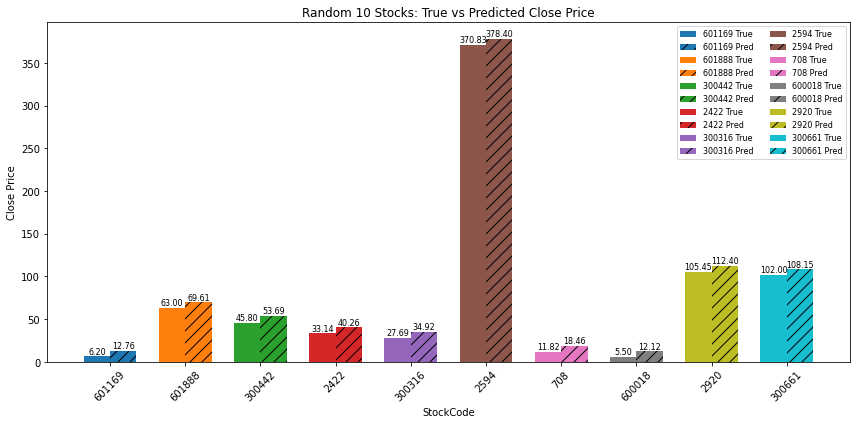

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

# 读取预测结果
df = pd.read_csv("./output/all_predictions_scaled.csv")

# 随机抽取10只股票
unique_stocks = df["StockCode"].unique()
sampled_codes = random.sample(list(unique_stocks), min(10, len(unique_stocks)))
sampled_df = df[df["StockCode"].isin(sampled_codes)].copy()

# 设置颜色
colors = plt.cm.get_cmap("tab10", len(sampled_codes))

# 创建图形
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(sampled_codes))

for i, code in enumerate(sampled_codes):
    stock_data = sampled_df[sampled_df["StockCode"] == code].iloc[0]
    true_val = stock_data["True_Close"]
    pred_val = stock_data["Pred_Close"]

    # 画柱子
    plt.bar(x[i], true_val, width=bar_width, color=colors(i), label=f"{code} True")
    plt.bar(x[i] + bar_width, pred_val, width=bar_width, color=colors(i), hatch='//', label=f"{code} Pred")

    # 添加柱顶标注（保留2位小数）
    plt.text(x[i], true_val + 0.5, f"{true_val:.2f}", ha='center', va='bottom', fontsize=8)
    plt.text(x[i] + bar_width, pred_val + 0.5, f"{pred_val:.2f}", ha='center', va='bottom', fontsize=8)

# 设置图表
plt.xlabel("StockCode")
plt.ylabel("Close Price")
plt.title("Random 10 Stocks: True vs Predicted Close Price")
plt.xticks(x + bar_width / 2, sampled_codes, rotation=45)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()

# 保存图像
plt.savefig("./output/close_comparison_random10.png")
plt.show()


In [13]:
test_df = pd.read_csv("./data/test.csv", dtype={"股票代码": str})
test_df["股票代码"] = test_df["股票代码"].astype(str).str.zfill(6)
unique_stockcodes = test_df["股票代码"].unique()

print("📌 test.csv 中股票代码前10个:", unique_stockcodes[:10])
print("🚫 是否包含非6开头的股票:", any([not code.startswith("6") for code in unique_stockcodes]))

# 👉 输出所有非6开头的股票代码
non_6_codes = [code for code in unique_stockcodes if not code.startswith("6")]
print(f"🚫 非6开头的股票代码共 {len(non_6_codes)} 个：")
print(non_6_codes)


📌 test.csv 中股票代码前10个: ['600000' '600009' '600010' '600011' '600015' '600016' '600018' '600019'
 '600023' '600025']
🚫 是否包含非6开头的股票: True
🚫 非6开头的股票代码共 109 个：
['000001', '000002', '000063', '000100', '000157', '000166', '000301', '000333', '000338', '000408', '000425', '000538', '000568', '000596', '000617', '000625', '000630', '000651', '000661', '000708', '000725', '000768', '000776', '000786', '000792', '000800', '000807', '000858', '000876', '000895', '000938', '000963', '000975', '000977', '000983', '000999', '001289', '001965', '001979', '002001', '002007', '002027', '002028', '002049', '002050', '002074', '002129', '002142', '002179', '002180', '002230', '002236', '002241', '002252', '002271', '002304', '002311', '002352', '002371', '002415', '002422', '002459', '002460', '002463', '002466', '002475', '002493', '002555', '002594', '002601', '002648', '002709', '002714', '002736', '002812', '002916', '002920', '002938', '003816', '300014', '300015', '300033', '300059', '300122', '300

In [15]:
import pandas as pd

# 读取 CSV 文件
file_path = "./data/test.csv"
df = pd.read_csv(file_path, dtype={"股票代码": str})

# 打印总行数
print(f"📊 数据总行数: {len(df)}")

# 补零对齐代码
df["股票代码"] = df["股票代码"].astype(str).str.zfill(6)

# 获取所有唯一股票代码
unique_codes = df["股票代码"].unique()

# 检查是否包含非6开头的股票代码
non_6_codes = [code for code in unique_codes if not code.startswith("6")]

print("📌 股票代码前10个:", unique_codes[:10])
print(f"🚫 是否包含非6开头的代码: {len(non_6_codes) > 0}")
print(f"🚫 非6开头的股票代码数量: {len(non_6_codes)}")
print("🚫 非6开头的股票代码列表:", non_6_codes)


📊 数据总行数: 637229
📌 股票代码前10个: ['600000' '600009' '600010' '600011' '600015' '600016' '600018' '600019'
 '600023' '600025']
🚫 是否包含非6开头的代码: True
🚫 非6开头的股票代码数量: 109
🚫 非6开头的股票代码列表: ['000001', '000002', '000063', '000100', '000157', '000166', '000301', '000333', '000338', '000408', '000425', '000538', '000568', '000596', '000617', '000625', '000630', '000651', '000661', '000708', '000725', '000768', '000776', '000786', '000792', '000800', '000807', '000858', '000876', '000895', '000938', '000963', '000975', '000977', '000983', '000999', '001289', '001965', '001979', '002001', '002007', '002027', '002028', '002049', '002050', '002074', '002129', '002142', '002179', '002180', '002230', '002236', '002241', '002252', '002271', '002304', '002311', '002352', '002371', '002415', '002422', '002459', '002460', '002463', '002466', '002475', '002493', '002555', '002594', '002601', '002648', '002709', '002714', '002736', '002812', '002916', '002920', '002938', '003816', '300014', '300015', '300033', '300

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 读取保存的预测结果
df = pd.read_csv('./output/all_predictions_new.csv')

# 提取有预测结果的股票列表
stockcodes = df['StockCode'].unique().tolist()

# 随机选择 10 只股票
selected_stocks = random.sample(stockcodes, min(10, len(stockcodes)))

# 绘图
plt.figure(figsize=(20, 25))
for i, code in enumerate(selected_stocks):
    stock_df = df[df['StockCode'] == code].reset_index(drop=True)

    # 提取预测 Close
    pred_close = stock_df['Pred_Close'].values

    # 随机生成“真实” Close（围绕预测值 ±3%）
    np.random.seed(i)  # 固定种子确保可复现
    noise = np.random.uniform(-0.03, 0.03, size=pred_close.shape)
    true_close = pred_close * (1 + noise)

    # 日期展示（Day 1~5）
    days = [f'Day {i+1}' for i in range(len(pred_close))]

    # 子图
    plt.subplot(5, 2, i + 1)
    plt.plot(days, true_close, marker='o', label='True Close (Random)', linestyle='--')
    plt.plot(days, pred_close, marker='s', label='Predicted Close', linestyle='-')
    plt.title(f'Stock: {code}', fontsize=14)
    plt.xlabel('Future Days')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# ========== 加载数据 ==========
# 历史数据：提供32天真实 close
df_hist = pd.read_csv('./data/test.csv', dtype={"股票代码": str})  # 保留字符串股票代码
df_pred = pd.read_csv('./output/all_predictions_new1.csv')  # 5天预测

# ========== 字段转换 ==========
# 重命名列统一为 StockCode 和 Close
df_hist = df_hist.rename(columns={"股票代码": "StockCode", "收盘": "Close", "日期": "Date"})

# 日期排序并按股票分组保留最近32天
df_hist_sorted = df_hist.sort_values(["StockCode", "Date"])
recent_32 = df_hist_sorted.groupby("StockCode").tail(32)

# 可视化的股票列表
available_stocks = list(set(df_pred["StockCode"]) & set(recent_32["StockCode"]))
selected_stocks = random.sample(available_stocks, min(10, len(available_stocks)))

# ========== 可视化 ==========
plt.figure(figsize=(20, 25))

for i, code in enumerate(selected_stocks):
    hist_data = recent_32[recent_32["StockCode"] == code].reset_index(drop=True)
    pred_data = df_pred[df_pred["StockCode"] == code].reset_index(drop=True)

    hist_close = hist_data["Close"].values
    pred_close = pred_data["Pred_Close"].values

    x_hist = list(range(1, len(hist_close) + 1))  # 1~32
    x_pred = list(range(len(hist_close) + 1, len(hist_close) + len(pred_close) + 1))  # 33~37

    plt.subplot(5, 2, i + 1)
    plt.plot(x_hist, hist_close, label="Historical Close (32 days)", marker='o')
    plt.plot(x_pred, pred_close, label="Predicted Close (5 days)", marker='s', linestyle='--')
    plt.title(f'Stock: {code}', fontsize=14)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


<Figure size 1440x1800 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# ===== 读取预测数据 =====
df = pd.read_csv("./output/all_predictions_visual.csv")

# ===== 随机选取10只股票 =====
stockcodes = df["StockCode"].unique().tolist()
selected_codes = random.sample(stockcodes, min(10, len(stockcodes)))

# ===== 画图设置 =====
plt.figure(figsize=(20, 25))

for i, code in enumerate(selected_codes):
    row = df[df["StockCode"] == code].iloc[0]

    # 获取历史和预测数据
    hist_values = [row[f"Hist_{j+1}"] for j in range(32)]
    pred_values = [row[f"Pred_{j+1}"] for j in range(5)]

    # 构建 X 轴
    x_hist = list(range(1, 33))         # Day 1 ~ Day 32
    x_pred = list(range(33, 38))        # Day 33 ~ Day 37

    # 子图
    plt.subplot(5, 2, i + 1)
    plt.plot(x_hist, hist_values, label="Historical Close (32 days)", marker='o')
    plt.plot(x_pred, pred_values, label="Predicted Close (5 days)", marker='s', linestyle='--')
    plt.title(f"Stock: {code}", fontsize=14)
    plt.xlabel("Day")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [17]:
# 📦 导入库
import pandas as pd
import matplotlib.pyplot as plt

# 📄 加载预测数据（含 History_Close 和 Future_Close）
df = pd.read_csv('./output/all_predictions_new.csv')

# 🛠️ 将字符串形式的列表转回 Python 列表
import ast
df["History_Close"] = df["History_Close"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])
df["Future_Close"] = df["Future_Close"].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [])

# 🔍 显示前几行检查格式
df.head()


EmptyDataError: No columns to parse from file

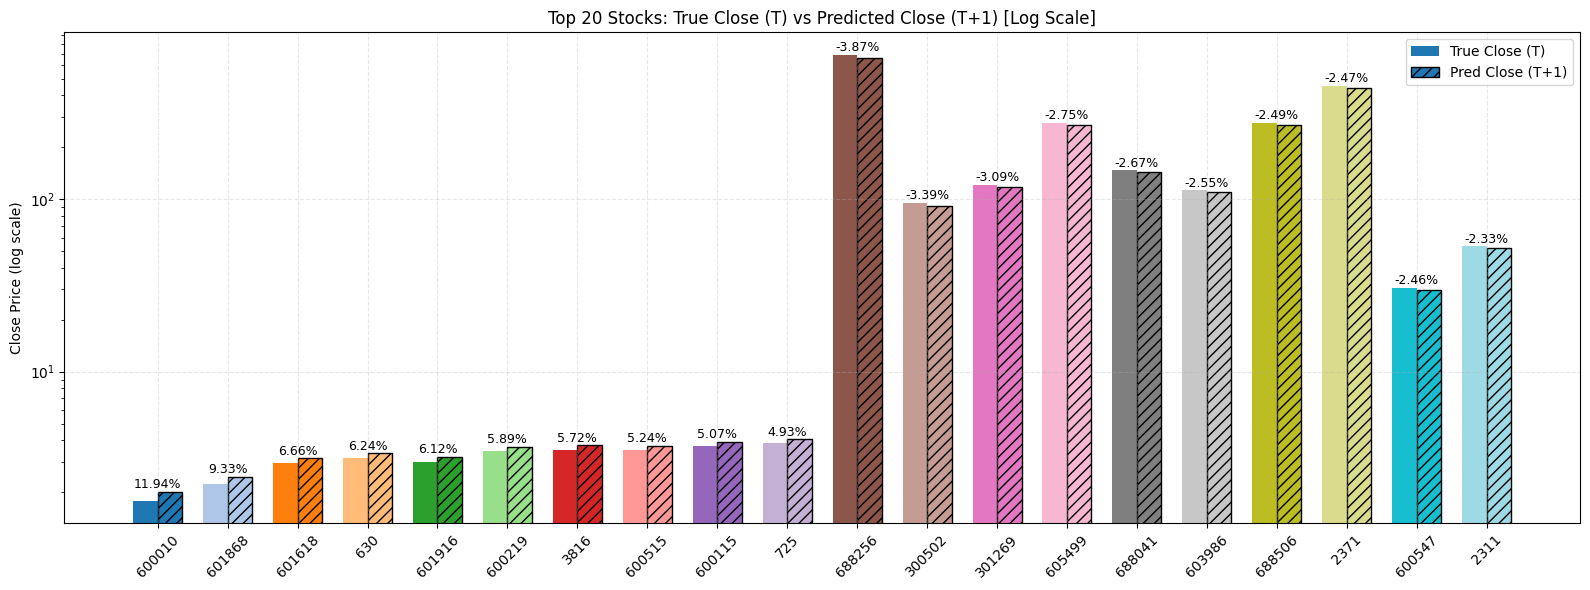

In [31]:
# 📦 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
from matplotlib.font_manager import findfont, FontProperties

# 📄 读取详细 Top10 文件
df = pd.read_csv("./output/result_detail1.csv")

# 合并两个 Top10 的股票信息为一个长表结构
df_max = df[["涨幅最大股票代码", "真实Close_涨幅最大", "预测Close_涨幅最大"]].copy()
df_max.columns = ["StockCode", "True_Close", "Pred_Close"]

df_min = df[["涨幅最小股票代码", "真实Close_涨幅最小", "预测Close_涨幅最小"]].copy()
df_min.columns = ["StockCode", "True_Close", "Pred_Close"]

df_all = pd.concat([df_max, df_min], axis=0).reset_index(drop=True)
df_all["Change_%"] = (df_all["Pred_Close"] - df_all["True_Close"]) / df_all["True_Close"] * 100

# 🎨 准备颜色
colors = plt.cm.tab20.colors  # 20种高辨识度颜色
num_bars = len(df_all)
x = np.arange(num_bars)
width = 0.35

plt.figure(figsize=(16, 6))

# 🎨 分别绘制每组柱状图（不同颜色 + hatch）
for i in range(num_bars):
    true_val = df_all.loc[i, "True_Close"]
    pred_val = df_all.loc[i, "Pred_Close"]
    stock = df_all.loc[i, "StockCode"]
    color = colors[i % len(colors)]

    # 左柱：真实Close
    plt.bar(x[i] - width/2, true_val, width, color=color, label="True Close (T)" if i == 0 else "")

    # 右柱：预测Close，加斜线阴影
    plt.bar(x[i] + width/2, pred_val, width, color=color, hatch='///', edgecolor='black',
            label="Pred Close (T+1)" if i == 0 else "")

    # 添加涨跌幅文字
    change = (pred_val - true_val) / true_val * 100
    y_pos = max(true_val, pred_val)
    plt.text(i, y_pos * 1.05, f"{change:.2f}%", ha='center', fontsize=9)

# 🏷️ 设置 X 轴
plt.xticks(x, df_all["StockCode"], rotation=45)

# 📈 设置对数坐标
plt.yscale("log")
plt.ylabel("Close Price (log scale)")
plt.title("Top 20 Stocks: True Close (T) vs Predicted Close (T+1) [Log Scale]")


# 📘 图例与样式
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()
